## Contrastive Material: Shakespeare, Goldoni, and Kotzebue

In this notebook, we explore Shakespeare, Goldoni, and Kotzebue's comedies. The analysis of Goldoni's comedies is based on a 30% stratified random sample. See https://github.com/innawendell/European_Comedy/blob/master/Analyses/Goldoni_Sample.ipynb.

We compare these authors based on the following features:
- The number of dramatic characters
- The mobility coefficient
- The standard range of the number of speaking characters (sigma)
- The percentage of non-dialogues
- The percetage of polylogues
- The percentage of monologues
- The percentage of discontinuous scenes
- The coefficient of unused dramatic characters.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def make_list(row):
    speech_dist = []
    for value in row[1:-1].split('\n '):
        speech_dist.append([int(num) for num in re.findall('[0-9]+', value)])
        
    return speech_dist

In [3]:
def speech_distribution_by_author(author_df):
    all_distributions = []
    for row in author_df['speech_distribution']:
        speech_dist_df = pd.DataFrame(row).T
        # rename columns to make sure they start with 1 and not 0
        speech_dist_df.columns = speech_dist_df.iloc[0, :]
        # no need to include the variants as a row - they will be column names
        only_counts_df = pd.DataFrame(speech_dist_df.iloc[1, :])
        only_counts_df.columns = ['raw_numbers']
        only_counts_df['percentage'] = only_counts_df['raw_numbers'] / only_counts_df.sum().values[0]
        all_distributions.append(round(only_counts_df['percentage'], 4))
    period_df_dist = pd.concat(all_distributions, axis=1).fillna(0)
    # take the mean for each period
    mean_per_type = pd.DataFrame(period_df_dist.mean(axis=1)).T 
    mean_per_type.index.name = 'number_of_speakers'
    mean_per_type = (mean_per_type * 100).round(2)
        
    return mean_per_type

In [4]:
def sigma_iarkho(df):
    """
    The function allows calculating standard range following iarkho's procedure.
    Parameters:
        df  - a dataframe where columns are variants, i.e., the distinct number of speakers in the ascending order, 
              e.g. [1, 2, 3, 4, 5] and values weights corresponding to these variants, i.e.,
              the number of scenes, e.g. [20, 32, 18, 9, 1]
    Returns:
        sigma - standard range per iarkho
    """
    weighted_mean_variants = np.average(df.columns.tolist(), weights=df.values[0])
    differences_squared = [(variant - weighted_mean_variants)**2 for variant in df.columns]
    weighted_mean_difference = np.average(differences_squared, weights=df.values[0])
    sigma = round(weighted_mean_difference**0.5, 2)

    return sigma

In [103]:
def summary_feature(df, feature):
    print('Mean, standard deviation, median, min and max values for the author:')
    display(df[feature].describe()[['mean', 'std', '50%','min', 'max']].round(2))
    print('Period Max:')
    display(df[df[feature] == df[feature].max()][['last_name', 'title', 'date', feature]].round(2))
    print('Period Min:')
    display(df[df[feature] == df[feature].min()][['last_name', 'title', 'date', feature]].round(2))


In [5]:
contr_data_df = pd.read_csv('../Contrastive_Material/Contrastive_Material_Data.csv')

In [6]:
contr_data_df['speech_distribution'] = contr_data_df['speech_distribution'].apply(make_list)

In [7]:
# sort by date
sorted_contr_data_df = contr_data_df.sort_values(by='date')

In [8]:
sorted_contr_data_df  = sorted_contr_data_df.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                           'percentage_non_duologues': 'percentage_non_dialogues',
                                                           'percentage_above_two_speakers': 'percentage_polylogues',
                                                            'percentage_scenes_with_discontinuous_change_characters': 
                                                            'discontinuous_scenes'
                                                            })


In [9]:
sorted_contr_data_df['date'] = sorted_contr_data_df['date'].astype('int')

In [10]:
sorted_contr_data_df['last_name'] = sorted_contr_data_df['last_name'].str.strip()

## Part I. William Shakespeare (1582 - 1616)

In [11]:
shakespeare_df = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Shakespeare'].copy()

In [12]:
shakespeare_df.columns

Index(['index', 'title', 'last_name', 'first_name', 'date', 'num_acts', 'url',
       'num_present_characters', 'num_scenes_text', 'mobility_coefficient',
       'speech_distribution', 'percentage_monologues', 'percentage_duologues',
       'percentage_non_dialogues', 'percentage_polylogues',
       'av_percentage_non_speakers', 'sigma_iarkho',
       'number_scenes_with_discontinuous_change_characters',
       'discontinuous_scenes', 'coefficient_unused'],
      dtype='object')

In [13]:
shakespeare_df.head()

,index,title,last_name,first_name,date,num_acts,url,num_present_characters,num_scenes_text,mobility_coefficient,speech_distribution,percentage_monologues,percentage_duologues,percentage_non_dialogues,percentage_polylogues,av_percentage_non_speakers,sigma_iarkho,number_scenes_with_discontinuous_change_characters,discontinuous_scenes,coefficient_unused
0,C_1,The Comedy of Errors,Shakespeare,William,1592,5.0,https://dracor.org/api/corpora/shake/play/the-...,19.0,11.0,53.0,"[[1, 11], [2, 17], [3, 13], [4, 6], [5, 2], [6...",20.75,32.08,67.92,47.17,22.182,1.823,9.0,16.981,33.48
1,C_3,The Two Gentlemen of Verona,Shakespeare,William,1593,5.0,https://dracor.org/api/corpora/shake/play/two-...,17.0,20.0,71.0,"[[1, 24], [2, 32], [3, 9], [4, 4], [5, 1], [6,...",33.80,45.07,54.93,21.13,14.272,1.021,19.0,26.761,21.11
2,C_4,Love’s Labor’s Lost,Shakespeare,William,1595,5.0,https://dracor.org/api/corpora/shake/play/love...,23.0,9.0,61.0,"[[1, 9], [2, 17], [3, 13], [4, 8], [5, 7], [6,...",14.75,27.87,72.13,57.38,32.540,1.890,8.0,13.115,46.93
3,C_5,The Merchant of Venice,Shakespeare,William,1596,5.0,https://dracor.org/api/corpora/shake/play/the-...,24.0,20.0,75.0,"[[1, 14], [2, 38], [3, 14], [4, 3], [5, 3], [6...",18.67,50.67,49.33,30.67,32.173,1.230,16.0,21.333,41.06
4,C_6,A Midsummer Night's Dream,Shakespeare,William,1596,5.0,https://dracor.org/api/corpora/shake/play/a-mi...,28.0,9.0,87.0,"[[1, 28], [2, 31], [3, 13], [4, 9], [5, 2], [6...",32.18,35.63,64.37,32.18,42.766,1.321,10.0,11.494,53.40


In [14]:
shakespeare_df.shape

(12, 20)

## The Number of Dramatic Characters

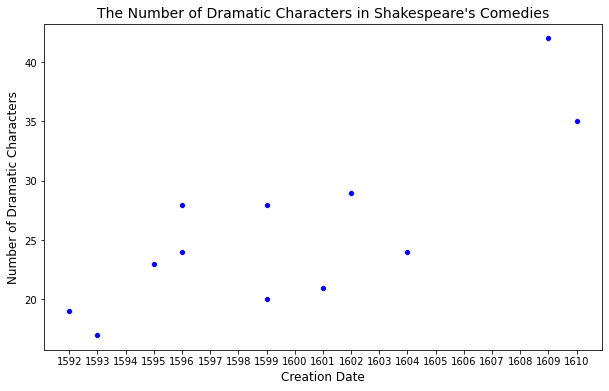

In [130]:
plt.figure(figsize=(10, 6))
plt.title('The Number of Dramatic Characters in Shakespeare\'s Comedies', fontsize=14)

sns.scatterplot('date', 'num_present_characters', 
                data=shakespeare_df, 
                color='blue' 
                )
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Number of Dramatic Characters', fontsize=12)
plt.show()

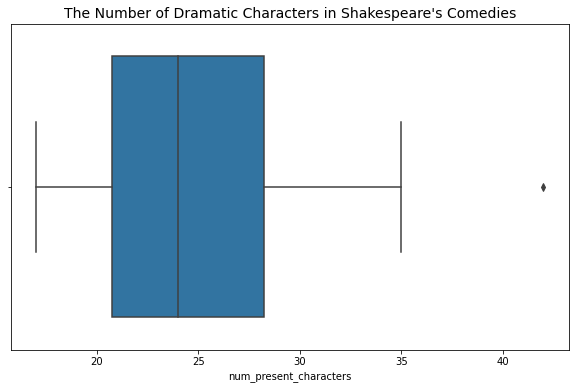

In [132]:
plt.figure(figsize=(10, 6))
plt.title('The Number of Dramatic Characters in Shakespeare\'s Comedies', fontsize=14)
sns.boxplot(shakespeare_df['num_present_characters'])
plt.show()

In [104]:
summary_feature(shakespeare_df, 'num_present_characters')

Mean, standard deviation, median, min and max values for the author:


mean    25.83
std      7.15
50%     24.00
min     17.00
max     42.00
Name: num_present_characters, dtype: float64

Period Max:


,last_name,title,date,num_present_characters
10,Shakespeare,Cymbeline,1609,42.0


Period Min:


,last_name,title,date,num_present_characters
1,Shakespeare,The Two Gentlemen of Verona,1593,17.0


The number of dramatic characters in Shakespeare's comedies grew over time. The mean number of dramatic characters is **25.83**. The minimum number was **17** (in *The Two Gentlemen of Verona* (1593)) and the maximum **42** (in *Cymbeline* (1609)).

## Mobility Coefficient

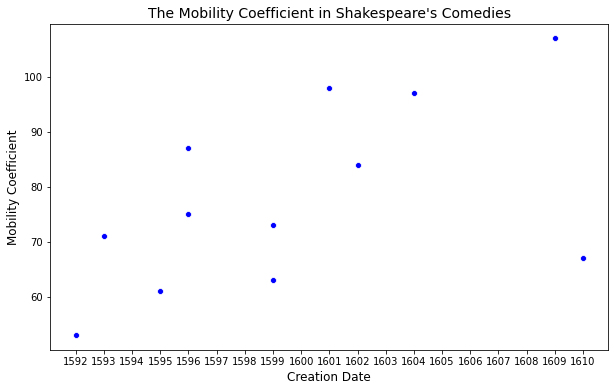

In [136]:
plt.figure(figsize=(10, 6))
plt.title('The Mobility Coefficient in Shakespeare\'s Comedies', fontsize=14)

sns.scatterplot('date', 'mobility_coefficient', 
                data=shakespeare_df, 
                color='blue', 
                )
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])

plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Mobility Coefficient', fontsize=12)
plt.show()

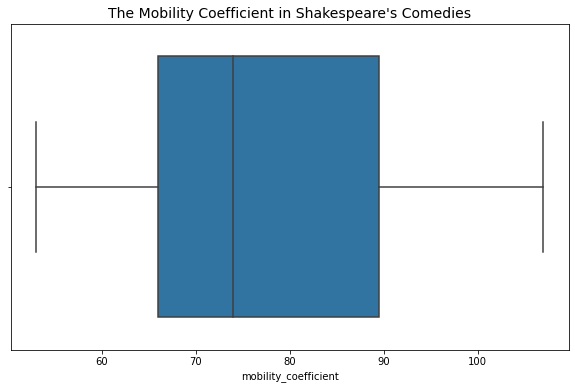

In [137]:
plt.figure(figsize=(10, 6))
plt.title('The Mobility Coefficient in Shakespeare\'s Comedies', fontsize=14)
sns.boxplot(shakespeare_df['mobility_coefficient'])
plt.show()

In [105]:
summary_feature(shakespeare_df, 'mobility_coefficient')

Mean, standard deviation, median, min and max values for the author:


mean     78.00
std      16.68
50%      74.00
min      53.00
max     107.00
Name: mobility_coefficient, dtype: float64

Period Max:


,last_name,title,date,mobility_coefficient
10,Shakespeare,Cymbeline,1609,107.0


Period Min:


,last_name,title,date,mobility_coefficient
0,Shakespeare,The Comedy of Errors,1592,53.0


Overall, the mobility coefficent also increased over time. The average mobility coefficient in Shakespeare's comedies was **78**. The minumum mobility coefficient was **53** (*The Comedy of Errors* (1592)) and the maximum **107** (*Cymbeline* (1609)). The latter had the highest number of dramatic characters and was the most mobile of all Shakespeare's comedies.

## Speech Distribution in Shakespeare's Comedies

In [20]:
speech_dist_shakespeare = speech_distribution_by_author(shakespeare_df)

In [21]:
speech_dist_shakespeare

,0,1,2,3,4,5,6,7,8,9,10,11
number_of_speakers,,,,,,,,,,,,
0,0.36,23.56,38.24,20.32,9.91,3.95,2.31,0.33,0.36,0.43,0.16,0.08


In [22]:
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_shakespeare), 2))

The standard range of the number of speaking characters: 1.4


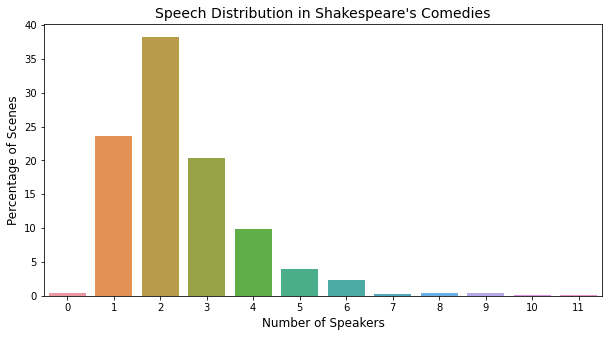

In [23]:
plt.figure(figsize=(10, 5))
plt.title('Speech Distribution in Shakespeare\'s Comedies', fontsize=14)
sns.barplot(speech_dist_shakespeare.columns.tolist(), 
            speech_dist_shakespeare.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)

plt.show()

Shakespeare's comedies had a rather wide range of the number of speakers: from zero (scenes where no one is speaking) to **11**. Dialogue, however, is still a dominant form with **38.24%**. Monologue is also quite prominent (**23.56%** of scenes). Sigma was **1.4**.

## The Percentage of Non-Dialogues

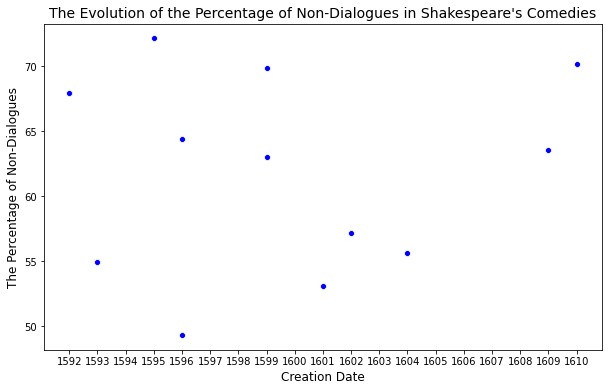

In [24]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Percentage of Non-Dialogues in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot('date', 'percentage_non_dialogues', data=shakespeare_df, color='blue')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Non-Dialogues', fontsize=12)
plt.show()

In [106]:
summary_feature(shakespeare_df, 'percentage_non_dialogues')

Mean, standard deviation, median, min and max values for the author:


mean    61.76
std      7.56
50%     63.28
min     49.33
max     72.13
Name: percentage_non_dialogues, dtype: float64

Period Max:


,last_name,title,date,percentage_non_dialogues
2,Shakespeare,Love’s Labor’s Lost,1595,72.13


Period Min:


,last_name,title,date,percentage_non_dialogues
3,Shakespeare,The Merchant of Venice,1596,49.33


We cannot tell if there is a clear historical development of the percentage of non-dialogues in Shakespeare's comedies. The average percentage of non-dialogues was **61.76%**. The minimum percentage of non-dialogues was **49.33%** (*The Merchant of Venice* (1596)), the maximum **72.13%** (*Love’s Labor’s Lost* (1595)).

## The Percentage of Polylogues

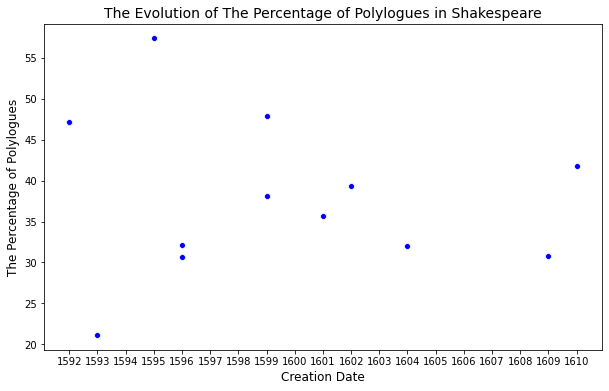

In [26]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Polylogues in Shakespeare', fontsize=14)

sns.scatterplot('date', 
                'percentage_polylogues', 
                 data=shakespeare_df, 
                 color='blue')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Polylogues', fontsize=12)
plt.show()

In [107]:
summary_feature(shakespeare_df, 'percentage_polylogues')

Mean, standard deviation, median, min and max values for the author:


mean    37.85
std      9.72
50%     36.90
min     21.13
max     57.38
Name: percentage_polylogues, dtype: float64

Period Max:


,last_name,title,date,percentage_polylogues
2,Shakespeare,Love’s Labor’s Lost,1595,57.38


Period Min:


,last_name,title,date,percentage_polylogues
1,Shakespeare,The Two Gentlemen of Verona,1593,21.13


In [101]:
shakespeare_df[shakespeare_df['percentage_polylogues'] > 45][['title', 'last_name', 'date', 'percentage_polylogues']]

,title,last_name,date,percentage_polylogues
0,The Comedy of Errors,Shakespeare,1592,47.17
2,Love’s Labor’s Lost,Shakespeare,1595,57.38
6,As You Like It,Shakespeare,1599,47.95


The percentage of polylogues remained stable over time. The top three comedies with the highest percentage of polylogues were written before 1600. They included *The Comedy of Errors* (1592) with 47.17% of polylogues, *Love’s Labor’s Lost* (1595) with 57.38% that was also the maxim of all comedies, and *As You Like It* (1599) with 47.95%. The average percentage of polylogues was **37.85%**. The minimum percentage of polylogues was **21.13%** in *The Two Gentlemen of Verona* (1593)).

## The Percentage of Monologues

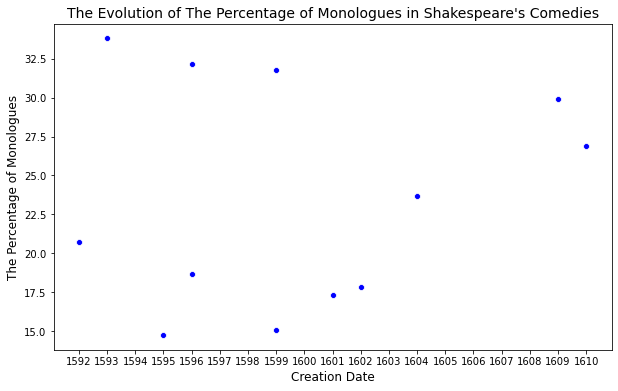

In [28]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Monologues in Shakespeare\'s Comedies', fontsize=14)
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])

sns.scatterplot('date', 
                'percentage_monologues', 
                 data=shakespeare_df, 
                 color='blue')
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Monologues', fontsize=12)
plt.show()

In [108]:
summary_feature(shakespeare_df, 'percentage_monologues')

Mean, standard deviation, median, min and max values for the author:


mean    23.56
std      7.07
50%     22.23
min     14.75
max     33.80
Name: percentage_monologues, dtype: float64

Period Max:


,last_name,title,date,percentage_monologues
1,Shakespeare,The Two Gentlemen of Verona,1593,33.8


Period Min:


,last_name,title,date,percentage_monologues
2,Shakespeare,Love’s Labor’s Lost,1595,14.75


In [86]:
shakespeare_df[(shakespeare_df['percentage_monologues'] < 22.5) &
              (shakespeare_df['date'] < 1600) ][['title', 'last_name', 'date', 'percentage_monologues']]

,title,last_name,date,percentage_monologues
0,The Comedy of Errors,Shakespeare,1592,20.75
2,Love’s Labor’s Lost,Shakespeare,1595,14.75
3,The Merchant of Venice,Shakespeare,1596,18.67
6,As You Like It,Shakespeare,1599,15.07


In [30]:
shakespeare_df[shakespeare_df['percentage_monologues'] > 30][['title', 'last_name', 'date', 'percentage_monologues']]

,title,last_name,date,percentage_monologues
1,The Two Gentlemen of Verona,Shakespeare,1593,33.80
4,A Midsummer Night's Dream,Shakespeare,1596,32.18
5,The Tempest,Shakespeare,1599,31.75


Before 1600, there were two groups of comedies: 

- Group one had a low percentage of monologues (below 22.5%): 20.75% in *The Comedy of Errors* (1592), 14.75% in *Love’s Labor’s Lost* (1595) that was also the minimum percentage of monologues among all comedies, 18.67% in *The Merchant of Venice* (1596), 15.07% in *As You Like It* (1599.
- Group two had a high percentage of monologues (above 30%): 33.80% in *The Two Gentlemen of Verona* (1593) that was the maximum percentage of monologues observed, 32.18% in *A Midsummer Night's Dream* (1596), 31.75% in *The Tempest*.

After 1600, the percentage of monologues is generally increasing. The mean number of monologues in all comedies was **23.56%**.

## The Coefficient of Unused Dramatic Characters

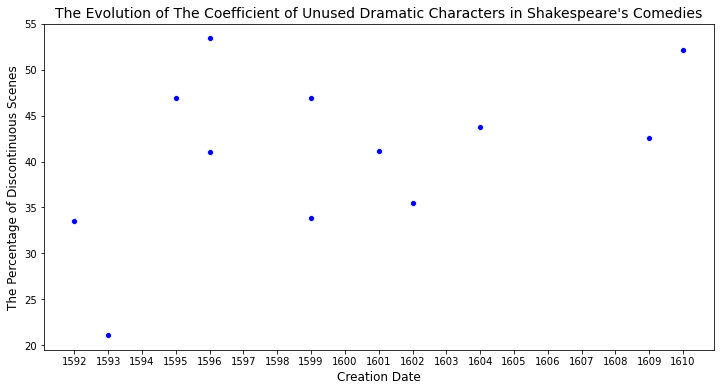

In [31]:
plt.figure(figsize=(12, 6))
plt.title('The Evolution of The Coefficient of Unused Dramatic Characters in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot('date', 'coefficient_unused', data=shakespeare_df, color='blue')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Discontinuous Scenes', fontsize=12)
plt.show()

In [109]:
summary_feature(shakespeare_df, 'coefficient_unused')

Mean, standard deviation, median, min and max values for the author:


mean    40.99
std      9.01
50%     41.90
min     21.11
max     53.40
Name: coefficient_unused, dtype: float64

Period Max:


,last_name,title,date,coefficient_unused
4,Shakespeare,A Midsummer Night's Dream,1596,53.4


Period Min:


,last_name,title,date,coefficient_unused
1,Shakespeare,The Two Gentlemen of Verona,1593,21.11


The coefficaverage coefficient of unused dramatic characters was **40.99%**. The maximum coefficient of unused dramatic characters was **53.4%** in *A Midsummer Night's Dream* (1596). The minimum was **21.11%** was in *The Two Gentlemen of Verona* (1593). This comedy also had the lowest number of dramatic characters.

## The Percentage of Discontinuous Scenes

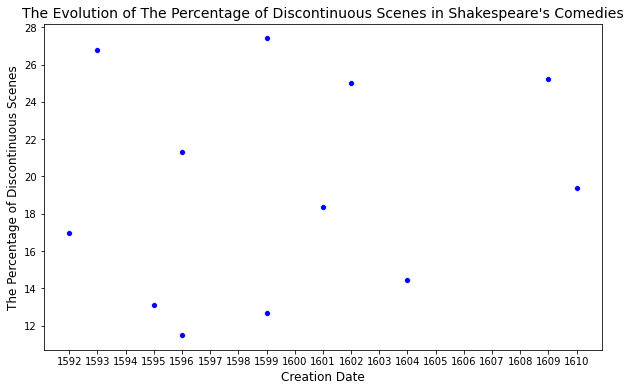

In [33]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Discontinuous Scenes in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot('date', 'discontinuous_scenes', data=shakespeare_df, color='blue')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Discontinuous Scenes', fontsize=12)
plt.show()

In [110]:
summary_feature(shakespeare_df, 'discontinuous_scenes')

Mean, standard deviation, median, min and max values for the author:


mean    19.35
std      5.77
50%     18.88
min     11.49
max     27.40
Name: discontinuous_scenes, dtype: float64

Period Max:


,last_name,title,date,discontinuous_scenes
6,Shakespeare,As You Like It,1599,27.4


Period Min:


,last_name,title,date,discontinuous_scenes
4,Shakespeare,A Midsummer Night's Dream,1596,11.49


The average percentage of discontinuous scenes was **19.35%** - it was uncommon for the scenes not to have overlapping dramatic characters. The maximum percentage of discotinuous scenes was **27.4%** in *As You Like It* (1599), the lowest **11.49%** in *A Midsummer Night's Dream* (1596). The mean percentage of discontinuous scenes was **19.35%**. We did not observe any clear historical development of this feature in Shakespeare's comedies.

## Part II. Carlo Goldoni (1707 - 1793)

In [35]:
goldoni_df = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Goldoni'].copy()

In [36]:
goldoni_df.head()

,index,title,last_name,first_name,date,num_acts,url,num_present_characters,num_scenes_text,mobility_coefficient,speech_distribution,percentage_monologues,percentage_duologues,percentage_non_dialogues,percentage_polylogues,av_percentage_non_speakers,sigma_iarkho,number_scenes_with_discontinuous_change_characters,discontinuous_scenes,coefficient_unused
12,C_16,La sposa persiana,Goldoni,Carlo,1753,5.0,http://www.intratext.com/IXT/ITA1289/_IDX150.HTM,12.0,51.0,53.0,"[[1, 14], [2, 24], [3, 9], [4, 4], [5, 2]]",26.42,45.28,54.72,28.30,7.358,1.023,7.0,13.208,12.69
13,C_17,Il filosofo inglese,Goldoni,Carlo,1754,5.0,http://www.intratext.com/IXT/ITA1289/_IDX089.HTM,13.0,82.0,94.0,"[[1, 19], [2, 41], [3, 15], [4, 12], [5, 5], [...",20.21,43.62,56.38,36.17,6.537,1.252,10.0,10.638,11.36
14,C_18,Il cavaliere giocondo,Goldoni,Carlo,1755,5.0,http://www.intratext.com/IXT/ITA1289/_IDX040.HTM,14.0,57.0,87.0,"[[1, 10], [2, 36], [3, 21], [4, 10], [5, 5], [...",11.49,41.38,58.62,47.13,11.795,1.510,11.0,12.644,14.88
15,C_19,Ircana in Ispaan,Goldoni,Carlo,1756,5.0,http://www.intratext.com/IXT/ITA1289/_IDX116.HTM,15.0,53.0,68.0,"[[1, 13], [2, 29], [3, 17], [4, 6], [5, 1], [6...",19.12,42.65,57.35,38.24,18.151,1.113,4.0,5.882,25.57
16,C_20,Il cavaliere di spirito o sia La donna di test...,Goldoni,Carlo,1757,5.0,http://www.intratext.com/IXT/ITA1289/_IDX049.HTM,7.0,38.0,41.0,"[[1, 10], [2, 26], [3, 5]]",24.39,63.41,36.59,12.20,3.049,0.592,3.0,7.317,4.94


In [37]:
goldoni_df.shape

(8, 20)

## The Number of Dramatic Characters

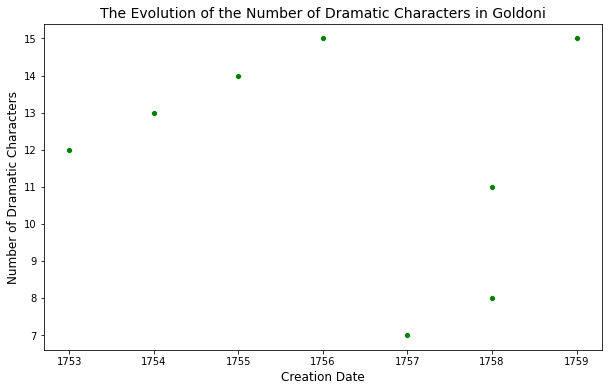

In [39]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Number of Dramatic Characters in Goldoni', fontsize=14)

sns.scatterplot('date', 'num_present_characters', 
                data=goldoni_df, 
                color='green' 
                )
plt.xticks([year for year in range(goldoni_df.date.min(), 
                                   goldoni_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Number of Dramatic Characters', fontsize=12)
plt.show()

In [111]:
summary_feature(goldoni_df, 'num_present_characters')

Mean, standard deviation, median, min and max values for the author:


mean    11.88
std      3.04
50%     12.50
min      7.00
max     15.00
Name: num_present_characters, dtype: float64

Period Max:


,last_name,title,date,num_present_characters
15,Goldoni,Ircana in Ispaan,1756,15.0
19,Goldoni,I morbinosi,1759,15.0


Period Min:


,last_name,title,date,num_present_characters
16,Goldoni,Il cavaliere di spirito o sia La donna di test...,1757,7.0


The mean number of dramatic characters in the sample of Goldoni's comedies was much lower than in Shakespeare - **11.88**. The maximum number of dramatic characters in the sample was indeed lower than Shakespeare's minimum **15** (in *Ircana in Ispaan* (1756) and *I morbinosi* (1759)). The minimum number of dramatic characters in the sample was **7** in *Il cavaliere di spirito o sia La donna di testa debole* (1757)).

## Mobility Coefficient

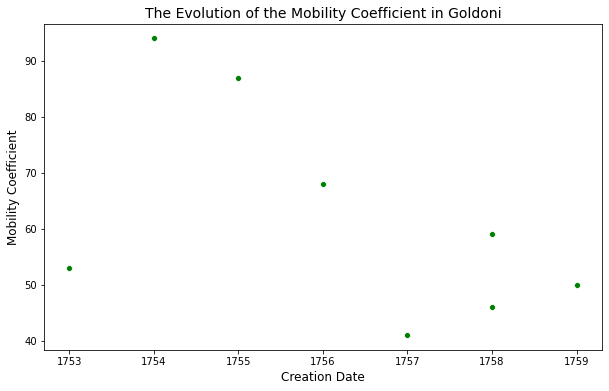

In [41]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Mobility Coefficient in Goldoni', fontsize=14)

sns.scatterplot('date', 'mobility_coefficient', 
                data=goldoni_df, 
                color='green', 
                )
plt.xticks([year for year in range(goldoni_df.date.min(), 
                                   goldoni_df.date.max()+1)])

plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Mobility Coefficient', fontsize=12)
plt.show()

In [112]:
summary_feature(goldoni_df, 'mobility_coefficient')

Mean, standard deviation, median, min and max values for the author:


mean    62.25
std     19.33
50%     56.00
min     41.00
max     94.00
Name: mobility_coefficient, dtype: float64

Period Max:


,last_name,title,date,mobility_coefficient
13,Goldoni,Il filosofo inglese,1754,94.0


Period Min:


,last_name,title,date,mobility_coefficient
16,Goldoni,Il cavaliere di spirito o sia La donna di test...,1757,41.0


The average mobility coefficient in the sample of Goldnoni's comedies is also lower than in Shakespeare's comedies **62.25** as is the maximum **94** (*Il filosofo inglese* (1754)). The minimum in the sample is also lower than in Shakespeare **41** in the comedy that also had the lowest number of dramatic characters (*Il cavaliere di spirito o sia La donna di testa debole* (1757)).

## Speech Distribution

In [43]:
speech_dist_goldoni = speech_distribution_by_author(goldoni_df)

In [44]:
speech_dist_goldoni

,0,1,2,3,4,5,6,7,8,9
number_of_speakers,,,,,,,,,,
0,0.25,19.65,41.36,19.2,11.6,5.41,1.5,0.53,0.36,0.14


In Goldoni's comedy *I morbinosi*, there is indeed a ball scene where no dramatic characters speak.

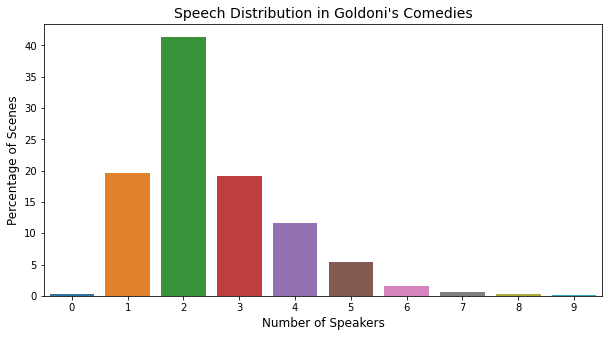

In [45]:
plt.figure(figsize=(10, 5))
plt.title('Speech Distribution in Goldoni\'s Comedies', fontsize=14)
sns.barplot(speech_dist_goldoni.columns.tolist(), 
            speech_dist_goldoni.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)

plt.show()

In [46]:
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_goldoni), 2))

The standard range of the number of speaking characters: 1.29


Goldoni, like Shakespeare, has a silent scene (during a ball) where no one is speaking. The range of speakers in the sample of his comedies is lower: from **0 to 9**, whereas in Shakespeare's comedies, up to **11** speakers are possible. This is reflected in a lower sigma of **1.29** vs. **1.4** in Shakespeare.

## The Percentage of Non-Dialogues

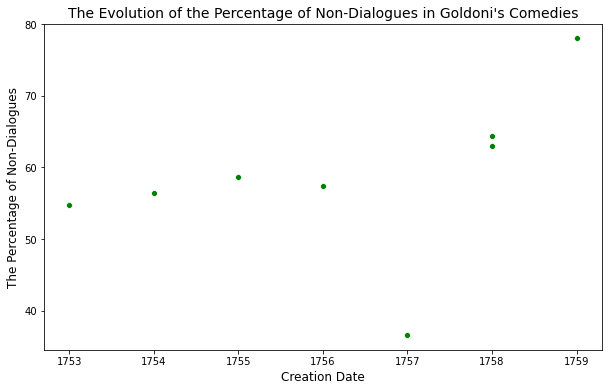

In [47]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Percentage of Non-Dialogues in Goldoni\'s Comedies', fontsize=14)
sns.scatterplot('date', 'percentage_non_dialogues', data=goldoni_df, color='green')
plt.xticks([year for year in range(goldoni_df.date.min(), 
                                   goldoni_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Non-Dialogues', fontsize=12)
plt.show()

In [113]:
summary_feature(goldoni_df, 'percentage_non_dialogues')

Mean, standard deviation, median, min and max values for the author:


mean    58.64
std     11.56
50%     57.98
min     36.59
max     78.00
Name: percentage_non_dialogues, dtype: float64

Period Max:


,last_name,title,date,percentage_non_dialogues
19,Goldoni,I morbinosi,1759,78.0


Period Min:


,last_name,title,date,percentage_non_dialogues
16,Goldoni,Il cavaliere di spirito o sia La donna di test...,1757,36.59


The mean percentage of non-dialogues in the sample of Goldoni's comedies was **58.64%** that is lower than in Shakespeare (**61.76%**). The maximum in the sample, however, is **78%** in *I morbinosi* (1759) that is higher than Shakespeare's maximum (**72.13%**). The minimum percentage of non-dialogues in Goldoni's sample is **36.59%** in the same comedy that has the lowest values of other features - Il cavaliere di spirito o sia La donna di testa debole (1757)).

## The Percentage of Polylogues

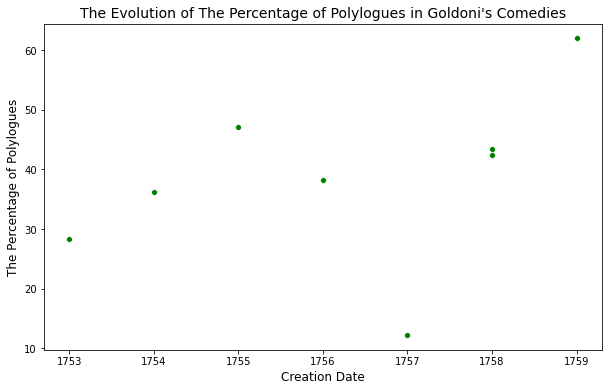

In [49]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Polylogues in Goldoni\'s Comedies', fontsize=14)

sns.scatterplot('date', 
                'percentage_polylogues', 
                 data=goldoni_df, 
                 color='green')
plt.xticks([year for year in range(goldoni_df.date.min(), 
                                   goldoni_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Polylogues', fontsize=12)
plt.show()

In [114]:
summary_feature(goldoni_df, 'percentage_polylogues')

Mean, standard deviation, median, min and max values for the author:


mean    38.74
std     14.48
50%     40.30
min     12.20
max     62.00
Name: percentage_polylogues, dtype: float64

Period Max:


,last_name,title,date,percentage_polylogues
19,Goldoni,I morbinosi,1759,62.0


Period Min:


,last_name,title,date,percentage_polylogues
16,Goldoni,Il cavaliere di spirito o sia La donna di test...,1757,12.2


What appears to be unusual is that the average percentage of polylogues in Goldoni's sample is higher than in Shakespeare (**38.37%** vs. **37.85%**). The maximum percentage of polylogues is also higher in Goldoni's sample (**62%** in *I morbinosi* (1759)) than in Shakespeare (**57.38%**). The minimum percentage of polylogues (**12.2%**) is observed once again in *Il cavaliere di spirito o sia La donna di testa debole* (1757)).

## The Percentage of Monologues

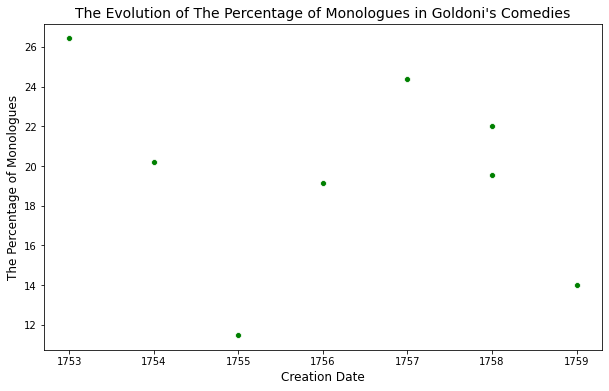

In [51]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Monologues in Goldoni\'s Comedies', fontsize=14)
plt.xticks([year for year in range(goldoni_df.date.min(), 
                                   goldoni_df.date.max()+1)])

sns.scatterplot('date', 
                'percentage_monologues', 
                 data=goldoni_df, 
                 color='green')
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Monologues', fontsize=12)
plt.show()

In [115]:
summary_feature(goldoni_df, 'percentage_monologues')

Mean, standard deviation, median, min and max values for the author:


mean    19.65
std      4.97
50%     19.89
min     11.49
max     26.42
Name: percentage_monologues, dtype: float64

Period Max:


,last_name,title,date,percentage_monologues
12,Goldoni,La sposa persiana,1753,26.42


Period Min:


,last_name,title,date,percentage_monologues
14,Goldoni,Il cavaliere giocondo,1755,11.49


Goldoni has fewer monologues than Shakespeare (**19.65%** on average vs. **23.56%** in Shakespeare's comedies). The maximum percentage of monologues in Goldoni's sample is **26.42%** (in *La sposa persiana* (1753)) vs. **33.8%** in Shakespeare, and the minimum is **11.49%** (in *Il cavaliere giocondo* (1755)) vs. **14.75** in Shakespeare.

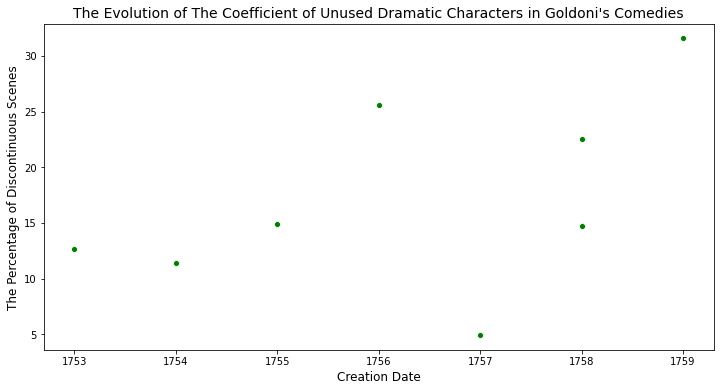

In [53]:
plt.figure(figsize=(12, 6))
plt.title('The Evolution of The Coefficient of Unused Dramatic Characters in Goldoni\'s Comedies', fontsize=14)
sns.scatterplot('date', 
                'coefficient_unused', 
                 data=goldoni_df, 
                 color='green')
plt.xticks([year for year in range(goldoni_df.date.min(), 
                                   goldoni_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Discontinuous Scenes', fontsize=12)
plt.show()

In [116]:
summary_feature(goldoni_df, 'coefficient_unused')

Mean, standard deviation, median, min and max values for the author:


mean    17.28
std      8.63
50%     14.80
min      4.94
max     31.56
Name: coefficient_unused, dtype: float64

Period Max:


,last_name,title,date,coefficient_unused
19,Goldoni,I morbinosi,1759,31.56


Period Min:


,last_name,title,date,coefficient_unused
16,Goldoni,Il cavaliere di spirito o sia La donna di test...,1757,4.94


The average coefficient of unused dramatic characters in Goldoni's sample is less than half of the coefficient in Shakespeare's comedies - **17.28%** vs **40.99%**. Both the maximum (**31.56%** in *I morbinosi* (1759) that had the maximum in the sample based on the number of dramatic characters, the percentage of non-dialogues, and the percentage of polylogues) and the minumum (again in *Il cavaliere di spirito o sia La donna di testa debole* (1757)) was lower in Goldoni's sample than in Shakespeare.

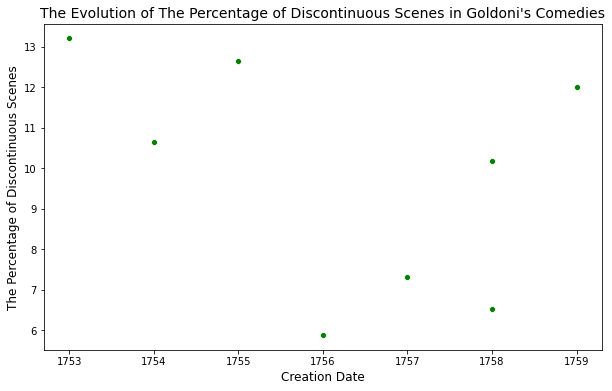

In [55]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Discontinuous Scenes in Goldoni\'s Comedies', fontsize=14)
sns.scatterplot('date', 
                'discontinuous_scenes', 
                data=goldoni_df, 
                color='green')
plt.xticks([year for year in range(goldoni_df.date.min(), 
                                   goldoni_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Discontinuous Scenes', fontsize=12)
plt.show()

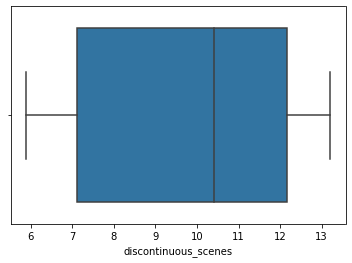

In [120]:
sns.boxplot(goldoni_df['discontinuous_scenes'])
plt.show()

In [117]:
summary_feature(goldoni_df, 'discontinuous_scenes')

Mean, standard deviation, median, min and max values for the author:


mean     9.80
std      2.87
50%     10.40
min      5.88
max     13.21
Name: discontinuous_scenes, dtype: float64

Period Max:


,last_name,title,date,discontinuous_scenes
12,Goldoni,La sposa persiana,1753,13.21


Period Min:


,last_name,title,date,discontinuous_scenes
15,Goldoni,Ircana in Ispaan,1756,5.88


The mean percentage of discontinuous scenes is also less than half of the percentage of discontinuous scenes in Shakespeare's comedies (**9.8%** vs. **19.35%**). Both the maximum (**13.21** in *La sposa persiana* (1753)) and the minimum (**5.88** in *Ircana in Ispaan* (1756)) are lower than Shakespeare's maxim (**27.4%**) and minimum (**11.49**).

## Part III. August von Kotzebue (1761 - 1819)

For Kotzebue, who primarily wrote prosaic comedies, we found only one 4-act comedy in verse *Der Russe in Deutschland* (1806). In general, it is challenging to compare 4-act comedies in verse with 5-act comedies in verse, since those may form a completely separate genre. In an attemp to level the playing field, for the features that may depend on the number of acts, we make them comparable to the 5-act comedies by multiplying the original values by 5/4.

In [56]:
kotzebue_df = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Kotzebue'].copy()

In [57]:
kotzebue_df

,index,title,last_name,first_name,date,num_acts,url,num_present_characters,num_scenes_text,mobility_coefficient,speech_distribution,percentage_monologues,percentage_duologues,percentage_non_dialogues,percentage_polylogues,av_percentage_non_speakers,sigma_iarkho,number_scenes_with_discontinuous_change_characters,discontinuous_scenes,coefficient_unused
20,C_24,Der Russe in Deutschland,Kotzebue,August von,1806,5.0,NaN,7.0,38.0,43.0,"[[1, 14], [2, 20], [3, 7], [4, 2]]",32.56,46.51,53.49,20.93,4.341,0.818,1.0,2.326,6.59


In [58]:
print('The number of dramatic characters:',
      kotzebue_df['num_present_characters'].values[0])
print('The number of dramatic characters comparable to five-act comedies:',
      round(kotzebue_df['num_present_characters'].values[0] * 5/4, 0))

The number of dramatic characters: 7.0
The number of dramatic characters comparable to five-act comedies: 9.0


In [59]:
print('Mobility Coefficient:',
      kotzebue_df['mobility_coefficient'].values[0])
print('Mobility Coefficient comparable to five-act comedies:'
      , round(kotzebue_df['mobility_coefficient'].values[0] * 5/4, 0))

Mobility Coefficient: 43.0
Mobility Coefficient comparable to five-act comedies: 54.0


In [60]:
speech_dist_kotzebue = speech_distribution_by_author(kotzebue_df)

In [61]:
speech_dist_kotzebue

,1,2,3,4
number_of_speakers,,,,
0,32.56,46.51,16.28,4.65


In [62]:
print('The standard range of the number of speaking characters:', 
       kotzebue_df['sigma_iarkho'].values[0])

The standard range of the number of speaking characters: 0.818


In [63]:
print('The percentage of non-dialogues:',
      kotzebue_df['percentage_non_dialogues'].values[0])

The percentage of non-dialogues: 53.49


In [64]:
print('The percentage of polylogues',
      kotzebue_df['percentage_polylogues'].values[0])

The percentage of polylogues 20.93


In [66]:
print('The coefficient of unused dramatic characters:',
      kotzebue_df['coefficient_unused'].values[0])

The coefficient of unused dramatic characters: 6.59


In [65]:
print('The percentage of discontinuous scenes:',
      kotzebue_df['discontinuous_scenes'].values[0])

The percentage of discontinuous scenes: 2.326


In Kotzebue's comedy, the number of dramatic characters is **7** (or **9** if compared to a 5-act comedy) speakers range from 1 to 4 (sigma is only **0.88**). The mobility coefficient is **43**) (or **54** in 5-act comedy values). The percentage of non-dialogues is **53.49%**, the percentage of polylogues is **20.93%**, and the percentage of monologues is **32.56%** that is higher than in Shakespeare on average (**23.56%**). Kotzebue's comedy has a low coefficient of unused dramatic characters **6.59%**. The scenes are extremely connected (the percentage of discontinuous scenes is only **2.326%**). It would be worthwhile to compare this comedy with Kotzebue's prosaic comedies.

## Conclusions:
1. On average, Shakespeare's comedies tend to have:
   - more dramatic characters (**25.83**) than both Goldoni (**11.08**) and Kotzebue (**9**)
   - higher mobility (**78**) than Goldoni (**62.25**) and Kotzebue (**54**).
   - a wider range of speakers (sigma=**1.4**, from 0 to 11 speakers) than Goldoni (sigma=1.29, from 0 to 9) and Kotzebue (sigma=**0.818**, from 1 to 4 speakers).
   - higher percentage of non-dialogues **61.76%** than in Goldoni **58.64%** and Kotzebue **53.49%**.
   - higher coefficient of unused dramatic characters (**40.99%**) vs. **17.28%** in Goldoni and **6.59%** in Kotzebue.
   - higher percentage of discontinuous scenes (**19.35%**) vs. **9.80%** in Goldoni's sample and **2.32%** in Kotzebue.
   
   
2. Goldoni has a higher average percentage of polylogues (**38.74%**) than both Shakespeare (**37.85%**) and Kotzebue (**20.93%**). 

3. Kotzebue has the highest percentage of monologues (**32.56%**) vs. **23.56%** in Shakespeare and **19.65%** in Goldoni's sample.
